In [1]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import LabelEncoder

In [2]:
df = pd.read_csv("Exam_Score_Prediction.csv")
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [3]:
df.shape

(20000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [6]:
y = df['exam_score'] # target

In [9]:
x = df.drop(["exam_score","student_id"],axis = 1)
x.head(10)


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate
5,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate
6,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard
7,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate
8,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy
9,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate


In [10]:
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == "object":
        x[col] = le.fit_transform(x[col])

In [11]:
x.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,17,1,6,2.78,92.9,1,7.4,2,0,1,1
1,23,2,5,3.37,64.8,1,4.6,0,3,2,2
2,22,1,1,7.88,76.8,1,8.5,2,0,0,2
3,20,2,6,0.67,48.4,1,5.8,0,3,1,2
4,20,0,6,0.89,71.6,1,9.8,2,0,1,2


In [12]:
x_train , x_test , y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
print("Training score",model.score(x_train,y_train))
print("testing score",model.score(x_test,y_test))

Training score 0.6695647908859319
testing score 0.6674472231649904


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

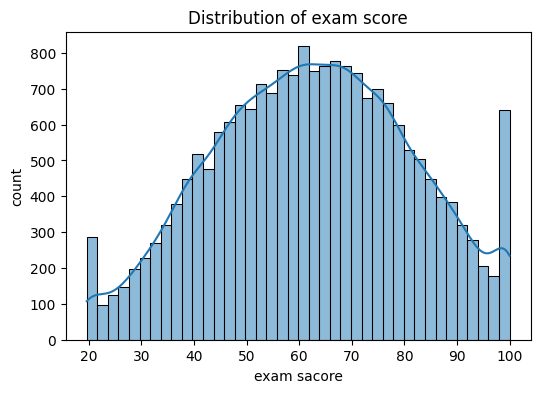

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["exam_score"],kde = True)
plt.title("Distribution of exam score")
plt.xlabel("exam sacore")
plt.ylabel("count")
plt.show()

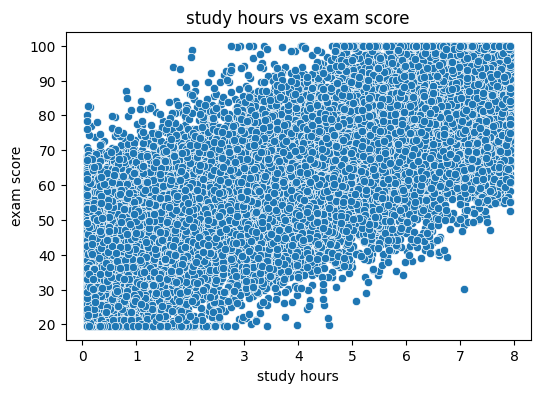

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='study_hours',y='exam_score',data=df)
plt.title("study hours vs exam score")
plt.xlabel("study hours")
plt.ylabel("exam score")
plt.show()